<a href="https://colab.research.google.com/github/Maath-Lima/data-science-studies/blob/main/Inside_a_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model

Carregar o dataset

In [ ]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

Exploração dos dados


Text(0.5, 1.0, '9')

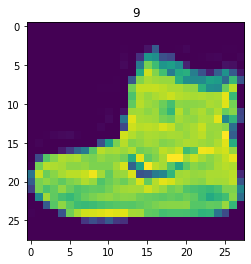

In [ ]:
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

In [ ]:
identificacoes_treino.min()
identificacoes_treino.max()

9

Visualizar as imagens com classificação


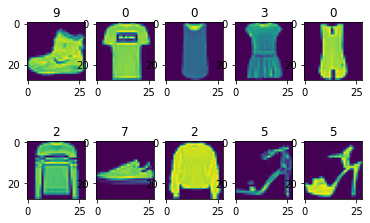

In [ ]:
for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(identificacoes_treino[imagem])


Visualizar as imagens com a classificação nomeada


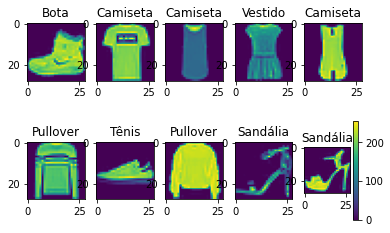

In [ ]:
# Visualizar as imagens com a classificação nomeada
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 
                           'Camisa', 'Tênis', 'Bolsa', 'Bota']

for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

plt.colorbar()

Normalizando as imagens

In [ ]:
imagens_treino= imagens_treino/float(255)

Criação do modelo e normalizando com o dropout

In [ ]:
modelo = keras.Sequential([
 keras.layers.Flatten(input_shape=(28, 28)),
 keras.layers.Dense(256, activation=tensorflow.nn.relu),
 keras.layers.Dropout(0.2),
 keras.layers.Dense(10, activation=tensorflow.nn.softmax)                 
])

Compilação do modelo

In [ ]:
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

Treinamento do modelo

In [ ]:
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5323 - accuracy: 0.8097 - val_loss: 0.4621 - val_accuracy: 0.8335
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3970 - accuracy: 0.8546 - val_loss: 0.3878 - val_accuracy: 0.8587
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3613 - accuracy: 0.8688 - val_loss: 0.3384 - val_accuracy: 0.8775
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3400 - accuracy: 0.8740 - val_loss: 0.3400 - val_accuracy: 0.8777
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3230 - accuracy: 0.8791 - val_loss: 0.3477 - val_accuracy: 0.8772


Súmario do modelo

In [ ]:
sumario_do_modelo = modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


Pesos da primeira camada dense

In [ ]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[ 0.02897445, -0.01251305, -0.04753394, ...,  0.03154733,
        -0.04999665,  0.0065224 ],
       [-0.00753625,  0.06277794, -0.00665808, ...,  0.05692489,
        -0.0608535 ,  0.05174921],
       [ 0.07143438,  0.00428498,  0.01894455, ...,  0.09494317,
        -0.27390566, -0.04158272],
       ...,
       [ 0.08342525,  0.0995781 ,  0.05751273, ...,  0.11268973,
        -0.15823591, -0.04753122],
       [ 0.08203443,  0.12737669,  0.05203254, ...,  0.10401151,
        -0.09855686, -0.11680037],
       [ 0.00743432,  0.10632782,  0.03996254, ..., -0.05853022,
        -0.09199501,  0.07381965]], dtype=float32)

In [ ]:
pesos_camada_dense_zerados = np.zeros(pesos_camada_dense.shape)
pesos_camada_dense_aleatorios = np.random.rand(784, 256)

'''
modelo.layers[1].set_weights([pesos_camada_dense_zerados, vieses_camada_dense])
'''

modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, vieses_camada_dense])

modelo.layers[1].get_weights()

Vieses da primeira camada dense

In [ ]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense

In [24]:
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 129.4904 - accuracy: 0.3976 - val_loss: 17.7444 - val_accuracy: 0.7186
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 32.4591 - accuracy: 0.6266 - val_loss: 12.9671 - val_accuracy: 0.7179
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 15.5165 - accuracy: 0.6917 - val_loss: 6.7522 - val_accuracy: 0.7740
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 7.4453 - accuracy: 0.7283 - val_loss: 3.7540 - val_accuracy: 0.7576
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 4.0950 - accuracy: 0.7523 - val_loss: 3.5165 - val_accuracy: 0.7317


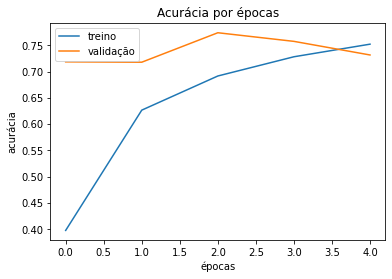

In [26]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])

plt.title('Acurácia por épocas')

plt.xlabel('épocas')
plt.ylabel('acurácia')

plt.legend(['treino', 'validação'])

In [27]:
modelo.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'name': 'flatten_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Flatten',
   'config': {'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'flatten',
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 256,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout',
    'noise_shape': None,
    'rate': 0.2,
    'seed': None

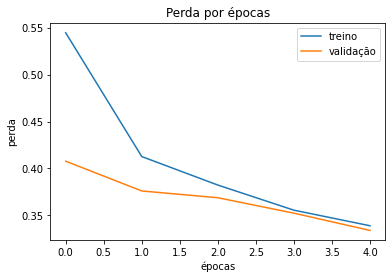

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])

plt.title('Perda por épocas')

plt.xlabel('épocas')
plt.ylabel('perda')

plt.legend(['treino', 'validação'])

Salvando e carregando o modelo treinado 

In [ ]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

Visualizando as acurácias de treinamento e validação por época

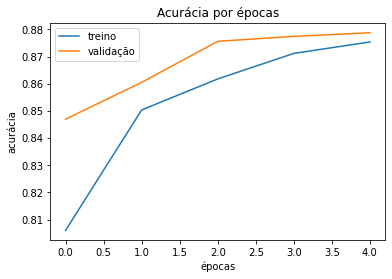

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])

plt.title('Acurácia por épocas')

plt.xlabel('épocas')
plt.ylabel('acurácia')

plt.legend(['treino', 'validação'])

Visualizado as perdas de treino e validação por época

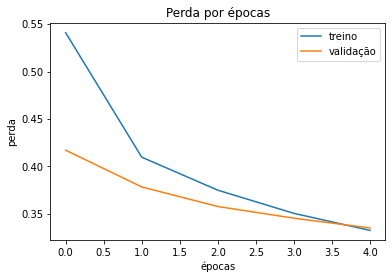

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])

plt.title('Perda por épocas')

plt.xlabel('épocas')
plt.ylabel('perda')

plt.legend(['treino', 'validação'])

Testando o modelo

In [ ]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

resultado teste: 2
número da imagem de teste: 2
resultado teste modelo salvo: 2
número da imagem de teste: 2


Avaliação do modelo

In [ ]:
perde_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)

print('Perda do teste:', perde_teste)
print('Acurácia do teste:', acuracia_teste)

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)



313/313 [==============================] - 1s 2ms/step - loss: 43.1762 - accuracy: 0.8591
Perda do teste: 43.17619323730469
Acurácia do teste: 0.8590999841690063
